In [1]:
import os
from numpy import *
import pandas as pd

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# import mplleaflet 
# import folium
plt.style.use("seaborn-darkgrid")
# plt.style.use("dark_background") # dark bg plots
sns.set(style="ticks", context="talk")
# %matplotlib inline
# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# disable nonsensical pandas warning 
pd.options.mode.chained_assignment = None

### Folder Structure

In [3]:
#%% Read in data
root = Path('/home/alal/res/India_Forests/')
code = root / 'Code'
data = root / 'Data'
spatial = data/'Spatial'

## Ingest Buffers around Treated Blocks

In [4]:
block_buf = gpd.read_file(spatial/"Processed/BLOCKS_sch_coded.geojson")
states    = gpd.read_file(spatial/"Vectors/IND_adm1.shp")

In [5]:
states['bound'] = states.boundary
states.geometry = states['bound']
# subset
blocks = block_buf.loc[:, ['sch', "named", "nameb", 'geometry']] 

In [6]:
w, s, e, n = blocks.total_bounds

(68.11009, 87.91343)

(12.62309, 33.22191)

Text(0.5, 1, 'Reserved and Unreserved Blocks under PESA \n 5th Schedule States')

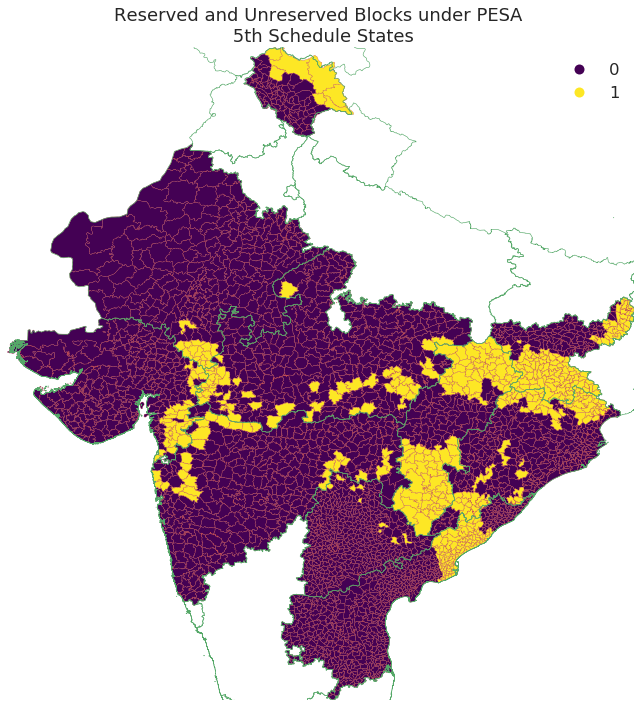

In [7]:
f, ax = plt.subplots(1, figsize=(12,12))
blocks.plot(column='sch', categorical=True, cmap = 'viridis', legend=True,
            edgecolor='r',linewidth=0.3,ax=ax)
states.plot(edgecolor='g',linewidth=0.6,ax=ax)
ax.set_xlim(w, e)
ax.set_ylim(s, n)
ax.set_title('Reserved and Unreserved Blocks under PESA \n 5th Schedule States')
ax.set_axis_off()

In [8]:
f.savefig(root / 'Output/treatment_map.pdf')

# Spatial Merge Villages from all (treatment/proximate) states with block treatments
Bigger buffer; includes Western and Northern States 

In [8]:
villages = Path("/home/alal/Dropbox/_Data/India_GIS/CENSUS/2011/2011_census/village map")
%cd $villages

/c/Users/alal/Dropbox/_Data/India_GIS/CENSUS/2011/2011_census/village map


In [9]:
%%time
andhra      = gpd.read_file('VILLAGE MAP A - H/ANDHRA PRADESH.shp')
chhat       = gpd.read_file('VILLAGE MAP A - H/CHHATTISGARH.shp')
gujarat     = gpd.read_file('VILLAGE MAP A - H/GUJARAT.shp')
himan       = gpd.read_file('VILLAGE MAP A - H/HIMACHAL PRADESH.shp')
jharkhand   = gpd.read_file('VILLAGE MAP J - P/JHARKHAND.shp')
maharashtra = gpd.read_file('VILLAGE MAP J - P/MAHARASHTRA.shp') 
madhya      = gpd.read_file('VILLAGE MAP J - P/MADHYA PRADESH.shp')
orissa      = gpd.read_file('VILLAGE MAP J - P/ODISHA.shp') 
rajasthan   = gpd.read_file('VILLAGE MAP R - W/RAJASTHAN.shp')

CPU times: user 43.1 s, sys: 4.05 s, total: 47.1 s
Wall time: 46.5 s


In [11]:
%%time
datalist = [jharkhand, orissa, chhat,  andhra,  gujarat, himan, madhya, 
            maharashtra, rajasthan]
village_stack = pd.concat(datalist, sort=False)

CPU times: user 297 ms, sys: 328 ms, total: 625 ms
Wall time: 615 ms


In [12]:
del datalist

## Temporarily set geometry to centroid

In [13]:
villages = village_stack.copy()
villages.crs = blocks.crs
villages.head()

,JHAR_ID,NAME,SUB_DIST,DISTRICT,STATE_UT,CODE_2011,LEVEL,TOT_HH,TOT_POP,M_POP,...,F_NNW,geometry,ODISHA_ID,CHHAT_ID,ANDHR_ID,GUJAR_ID,HP_ID,MADHYA_ID,MAHARA_ID,RAJAS_ID
0,1.0,Janumpi,Majhgaon,Pashchimi Singhbhum,Jharkhand,2036802745378466,Village,73.0,399.0,199.0,...,80.0,"POLYGON ((85.89696 21.98907, 85.89709 21.98904...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Buruikuti,Majhgaon,Pashchimi Singhbhum,Jharkhand,2036802745378491,Village,122.0,710.0,347.0,...,190.0,"POLYGON ((85.83532 21.99219, 85.83662 21.99089...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Benisagar,Majhgaon,Pashchimi Singhbhum,Jharkhand,2036802745378467,Village,137.0,667.0,319.0,...,145.0,"POLYGON ((85.88185 21.99527, 85.88362 21.99454...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Tiraposi,Majhgaon,Pashchimi Singhbhum,Jharkhand,2036802745378492,Village,163.0,930.0,460.0,...,199.0,"POLYGON ((85.87063 22.00095, 85.87117 22.00030...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Balibandh,Majhgaon,Pashchimi Singhbhum,Jharkhand,2036802745378496,Village,306.0,1558.0,753.0,...,383.0,"POLYGON ((85.77795 22.00883, 85.77991 22.00846...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
villages['centr'] = villages.centroid
villages = villages.set_geometry('centr')
villages.shape
villages.head()

(308742, 102)

,JHAR_ID,NAME,SUB_DIST,DISTRICT,STATE_UT,CODE_2011,LEVEL,TOT_HH,TOT_POP,M_POP,...,geometry,ODISHA_ID,CHHAT_ID,ANDHR_ID,GUJAR_ID,HP_ID,MADHYA_ID,MAHARA_ID,RAJAS_ID,centr
0,1.0,Janumpi,Majhgaon,Pashchimi Singhbhum,Jharkhand,2036802745378466,Village,73.0,399.0,199.0,...,"POLYGON ((85.89696 21.98907, 85.89709 21.98904...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (85.90553 21.98023)
1,2.0,Buruikuti,Majhgaon,Pashchimi Singhbhum,Jharkhand,2036802745378491,Village,122.0,710.0,347.0,...,"POLYGON ((85.83532 21.99219, 85.83662 21.99089...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (85.83041 21.98371)
2,3.0,Benisagar,Majhgaon,Pashchimi Singhbhum,Jharkhand,2036802745378467,Village,137.0,667.0,319.0,...,"POLYGON ((85.88185 21.99527, 85.88362 21.99454...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (85.88588 21.98550)
3,4.0,Tiraposi,Majhgaon,Pashchimi Singhbhum,Jharkhand,2036802745378492,Village,163.0,930.0,460.0,...,"POLYGON ((85.87063 22.00095, 85.87117 22.00030...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (85.87052 21.98888)
4,5.0,Balibandh,Majhgaon,Pashchimi Singhbhum,Jharkhand,2036802745378496,Village,306.0,1558.0,753.0,...,"POLYGON ((85.77795 22.00883, 85.77991 22.00846...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (85.78345 21.99584)


In [15]:
%%time
vil_treat = gpd.sjoin(villages, blocks, how='inner', op='within')

CPU times: user 18.8 s, sys: 2.36 s, total: 21.1 s
Wall time: 21.1 s


In [16]:
villages.shape
vil_treat.shape

(308742, 102)

(308503, 106)

## Switch back

In [18]:
vv = vil_treat.drop(['centr'], axis = 1).set_geometry('geometry')
vv.geometry.head()

0    POLYGON ((85.89696 21.98907, 85.89709 21.98904...
1    POLYGON ((85.83532 21.99219, 85.83662 21.99089...
2    POLYGON ((85.88185 21.99527, 85.88362 21.99454...
3    POLYGON ((85.87063 22.00095, 85.87117 22.00030...
4    POLYGON ((85.77795 22.00883, 85.77991 22.00846...
Name: geometry, dtype: geometry

CPU times: user 55.3 s, sys: 1.11 s, total: 56.4 s
Wall time: 56.2 s


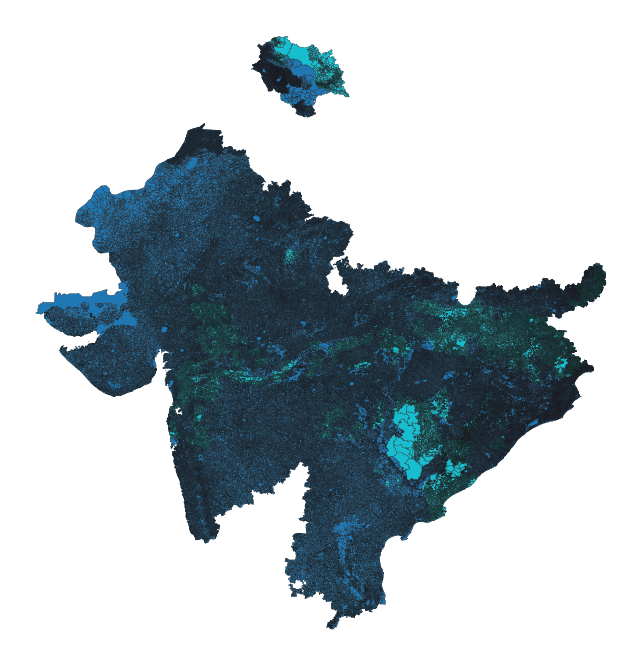

In [19]:
%%time
f, ax = plt.subplots(1, figsize=(12,12))
vv.plot(column='sch', categorical=True, edgecolor='k',linewidth=0.3,ax=ax)
ax.set_axis_off()

# Process and Write 

In [20]:
n_blocks_vill = vv.groupby('CODE_2011').nameb.nunique().sort_values(ascending = False)
n_blocks_vill.head()

CODE_2011
2853704517802918    3
2138603049645604    2
2035002546801769    2
2853704521802918    2
3463405908804035    1
Name: nameb, dtype: int64

In [23]:
%%time
vv.to_file(spatial/'Processed/Village_stack_treatment.gpkg', driver = 'GPKG')

CPU times: user 15min 15s, sys: 8.64 s, total: 15min 24s
Wall time: 15min 33s
